<img src="res/logo/coolpi.png" width="200">

# Jupyter Notebook

# 03. - Spectral Objects

## Import packages 

In [1]:
import sys
sys.version 

'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [2]:
import os
%matplotlib inline

## Illuminant

In [3]:
from coolpi.colour.cie_colour_spectral import Illuminant

### To create an instance

To create an instance of the `Illuminant` class, simply enter the required parameters as follows:

In [4]:
D65 = Illuminant(cie_illuminant_name="d65", normalised = False)
type(D65)

coolpi.colour.cie_colour_spectral.Illuminant

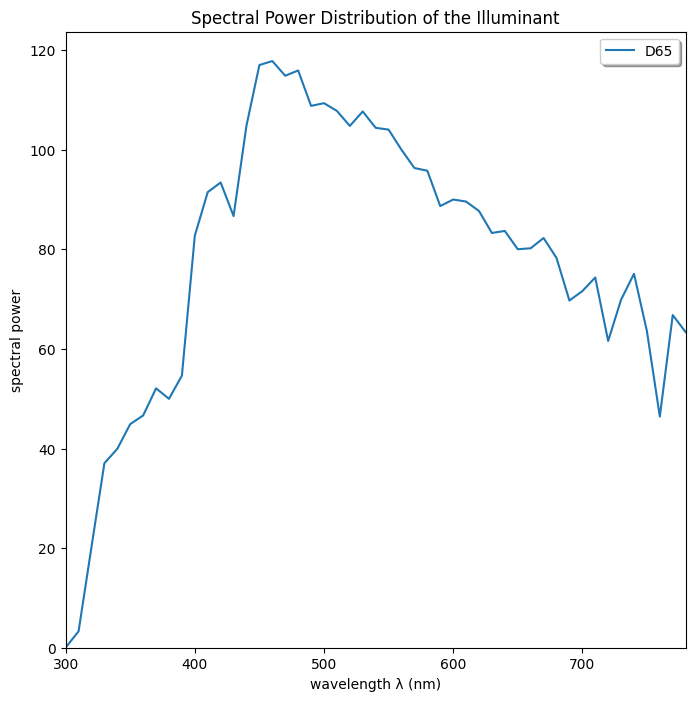

In [5]:
path_figure = os.path.join(*["res", "plot", "D65_spd.png"]) # your path here
D65.plot(show_figure=True, save_figure=True, output_path=path_figure)

The *Illuminant* object should be instantiated for a valid CIE standard illuminant:

In [6]:
D30 = Illuminant(cie_illuminant_name="d30", normalised = False)

CIEIlluminantError: The input illuminant name is not a valid CIE standard illuminant.

### Attributes

In [7]:
print(D65.type)
print(D65.subtype)
print(D65.illuminant_name)
print(D65.nm_range)
print(D65.nm_interval)
print(D65.lambda_values)
print(D65.normalised)

Spectral Object
CIE Illuminant (SPD)
D65
[300, 780]
5
[0.0341, 1.6643, 3.2945, 11.7652, 20.236, 28.6447, 37.0535, 38.5011, 39.9488, 42.4302, 44.9117, 45.775, 46.6383, 49.3637, 52.0891, 51.0323, 49.9755, 52.3118, 54.6482, 68.7015, 82.7549, 87.1204, 91.486, 92.4589, 93.4318, 90.057, 86.6823, 95.7736, 104.865, 110.936, 117.008, 117.41, 117.812, 116.336, 114.861, 115.392, 115.923, 112.367, 108.811, 109.082, 109.354, 108.578, 107.802, 106.296, 104.79, 106.239, 107.689, 106.047, 104.405, 104.225, 104.046, 102.023, 100, 98.1671, 96.3342, 96.0611, 95.788, 92.2368, 88.6856, 89.3459, 90.0062, 89.8026, 89.5991, 88.6489, 87.6987, 85.4936, 83.2886, 83.4939, 83.6992, 81.863, 80.0268, 80.1207, 80.2146, 81.2462, 82.2778, 80.281, 78.2842, 74.0027, 69.7213, 70.6652, 71.6091, 72.979, 74.349, 67.9765, 61.604, 65.7448, 69.8856, 72.4863, 75.087, 69.3398, 63.5927, 55.0054, 46.4182, 56.6118, 66.8054, 65.0941, 63.3828]
False


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [8]:
print(D65)

Illuminant object: CIE D65 standard illuminant


`To get the SPD as a diagonal array`:

In [9]:
D65_as_np = D65.as_diagonal_array()
type(D65_as_np)

numpy.ndarray

In [10]:
print(D65_as_np.shape)

(97, 97)


`To set the SPD into the visible range spectrum`:

In [11]:
D65.set_into_visible_range_spectrum(visible_nm_range = [400,700], visible_nm_interval = 10)

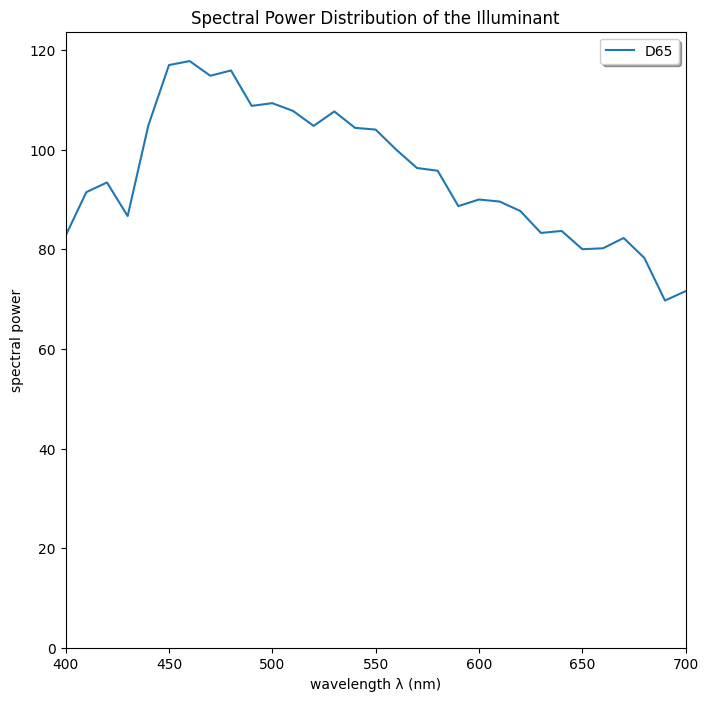

In [12]:
path_figure = os.path.join(*["res", "plot", "D65_spd_visible.png"]) # your path here
D65.plot(show_figure=True, save_figure=True, output_path=path_figure)

`To normalise the SPD data`:

In [13]:
D65 = Illuminant(cie_illuminant_name="d65", normalised = True)

In [14]:
D65.normalised

True

An alternative way to normalise the spectral data:

In [15]:
D65 = Illuminant(cie_illuminant_name="d65", normalised = False)

In [16]:
D65.normalise_lambda_values()
D65.normalised

True

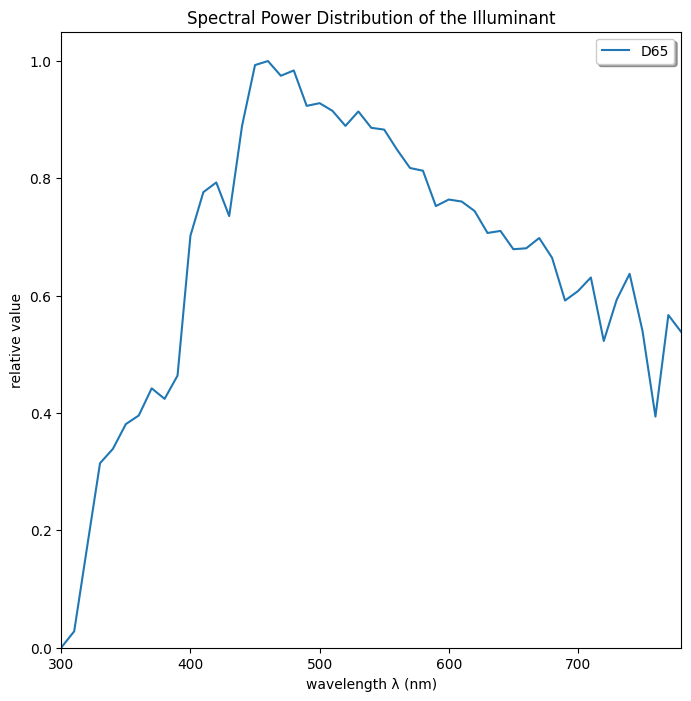

In [17]:
path_figure = os.path.join(*["res", "plot", "D65_spd_norm.png"]) # your path here
D65.plot(show_figure=True, save_figure=True, output_path=path_figure)

`WhitePoint computations`:

To get the theoretical CIE XYZ data of the *Illuminant* WhitePoint:

In [18]:
Xn, Yn, Zn = D65.get_theoretical_white_point_XYZ(observer=2)
print(Xn, Yn, Zn)

95.04 100.0 108.88


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [19]:
from coolpi.colour.cie_colour_spectral import Observer

In [20]:
obs = Observer(10)

In [21]:
Xn, Yn, Zn = D65.get_theoretical_white_point_XYZ(observer=obs)
print(Xn, Yn, Zn)

94.81 100.0 107.32


Theoretical data are available only for CIE Illuminants: A, C, D50, D55, D65, D75. The class method returns `None`
for all the remaining illuminants: 

In [22]:
LED1 = Illuminant("LED-B1")

In [23]:
Xn, Yn, Zn = LED1.get_theoretical_white_point_XYZ(observer=2)
print(Xn, Yn, Zn)

None None None


To compute the XYZ values of the *Illuminant* WhitePoint (it provides similar results compared to theoretical data):

In [24]:
Xn, Yn, Zn = D65.compute_white_point_XYZ(observer=2)
print(Xn, Yn, Zn)

95.04296621098943 100.00000000000007 108.88005680506745


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [25]:
Xn, Yn, Zn = D65.compute_white_point_XYZ(observer=obs)
print(Xn, Yn, Zn)

94.81179251714113 99.99999999999999 107.31944255522858


To compute the x,y chromaticity coordinates of the *Illuminant* WhitePoint:

In [26]:
xn, yn = D65.compute_white_point_xy(observer=2)
print(xn, yn)

0.31272052136033174 0.32903068351855935


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [27]:
xn, yn = D65.compute_white_point_xy(observer=10)
print(xn, yn)

0.3138099657072225 0.330981998521427


To compute the u',v' chromaticity coordinates of the *Illuminant* WhitePoint:

In [28]:
un, vn = D65.compute_white_point_uv_1976(observer=2)
print(un, vn)

0.1978327527562152 0.4683394378846908


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [29]:
un, vn = D65.compute_white_point_uv_1976(observer=obs)
print(un, vn)

0.19785740922985115 0.4695398736256153


To compute the u,v chromaticity coordinates of the *Illuminant* WhitePoint:

In [30]:
un, vn = D65.compute_white_point_uv_1960(observer=2)
print(un, vn)

0.1978327527562152 0.31222629192312723


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [31]:
un, vn = D65.compute_white_point_uv_1960(observer=obs)
print(un, vn)

0.19785740922985115 0.3130265824170768


`CCT computations`: 

In [32]:
cct_k = D65.compute_CCT(method="McCamy")
print(cct_k)

6503.738306232476


In [33]:
cct_k = D65.compute_CCT(method="Hernandez")
print(cct_k)

6499.391166487143


In [34]:
cct_k = D65.compute_CCT(method="Ohno")
print(cct_k)

6502.887111814883


To compute the $\Delta{uv}$ of the *Illuminant*:

In [35]:
Duv = D65.compute_Duv()
print(Duv)

0.0032128098677425


### Plot

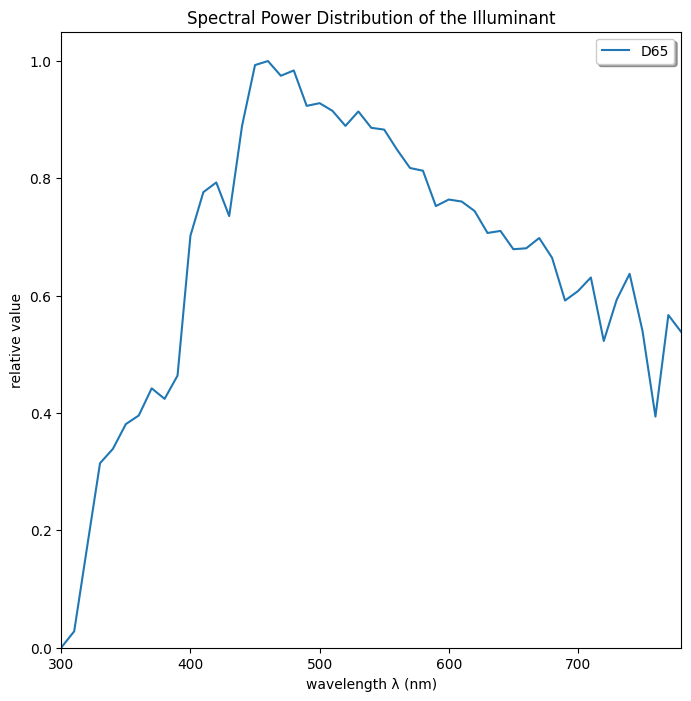

In [36]:
D65.plot()

To save the figure:

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [37]:
path_figure = os.path.join(*["res", "plot", "D65_spd_norm.png"]) # your path here
D65.plot(show_figure = False, save_figure = True, output_path = path_figure)

CIE 1931 x,y Chromaticity Diagram

The x,y values of the *Illuminant* WhitePoint can be represented as follows:

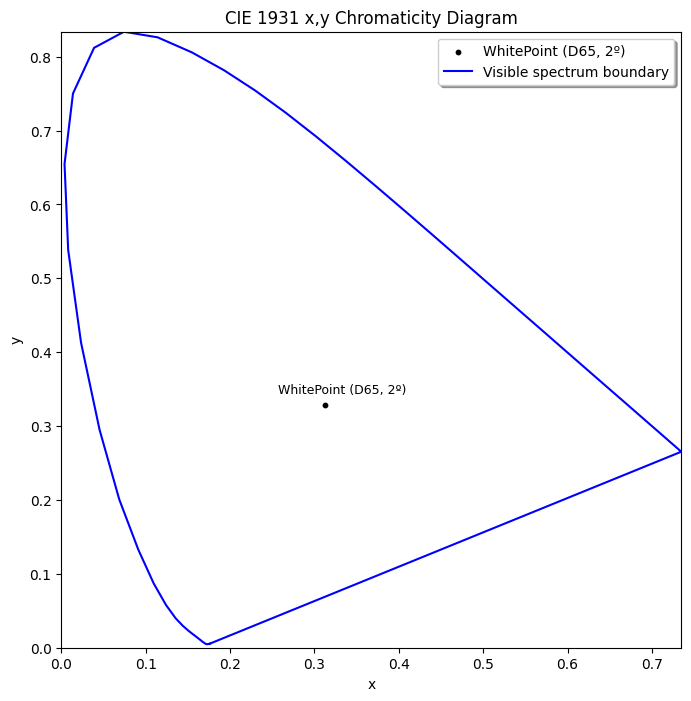

In [38]:
D65.plot_xy_white_point(observer=2)

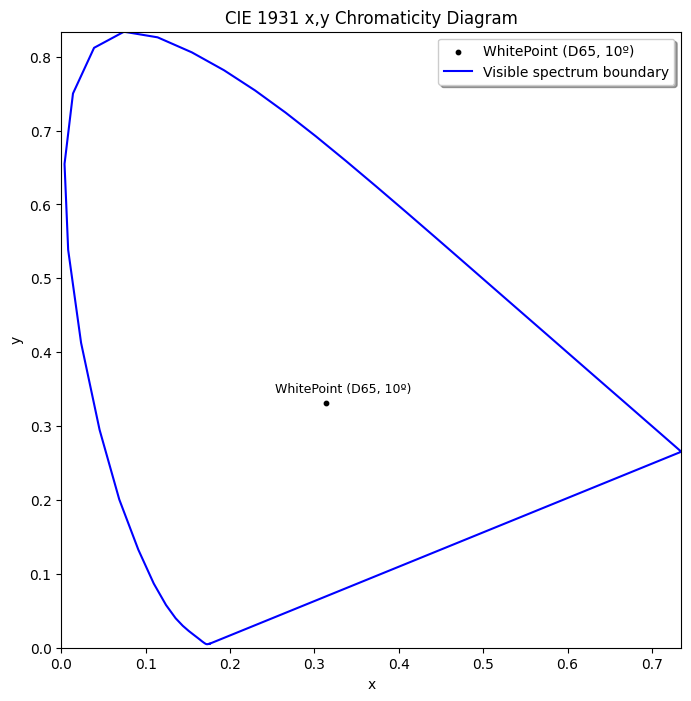

In [39]:
D65.plot_xy_white_point(observer=obs)

In [40]:
path_figure = os.path.join(*["res", "plot", "D65_xy_2.png"]) # your path here
D65.plot_xy_white_point(observer=2, show_figure = False, save_figure = True, output_path = path_figure)

In [41]:
path_figure = os.path.join(*["res", "plot", "D65_xy_10.png"]) # your path here
D65.plot_xy_white_point(observer=obs, show_figure = False, save_figure = True, output_path = path_figure)

## IlluminantFromCCT

In [42]:
from coolpi.colour.cie_colour_spectral import IlluminantFromCCT

### To create an instance:

To create an instance of the `IlluminantFromCCT` class, simply enter the required CCT (in ºK) as follows:

In [43]:
cct_6500 = IlluminantFromCCT(cct_K=6500)
type(cct_6500)

coolpi.colour.cie_colour_spectral.IlluminantFromCCT

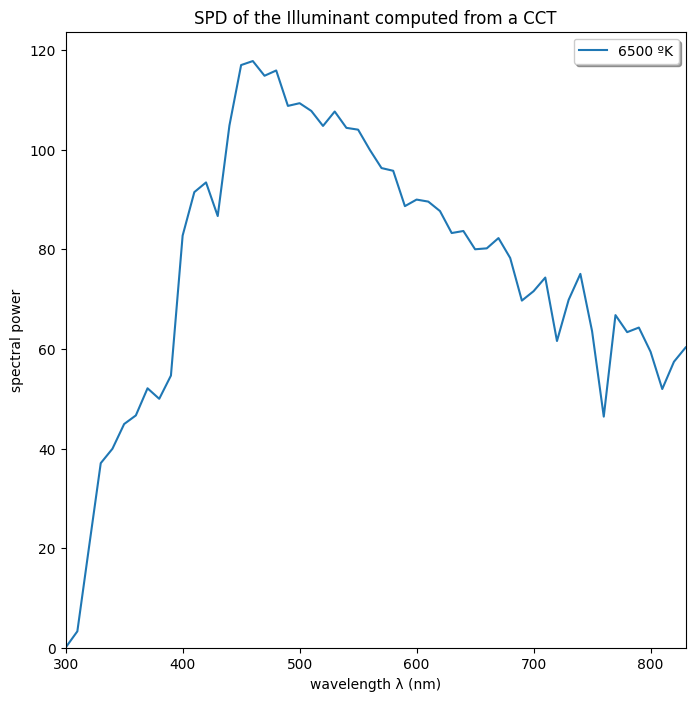

In [44]:
path_figure = os.path.join(*["res", "plot", "6500_spd.png"]) # your path here
cct_6500.plot(show_figure = True, save_figure = True, output_path = path_figure)

The input CCT should be into the valid range (4000-25000):

In [45]:
cct_1000 = IlluminantFromCCT(1000)

CCTNotInValidRangeError: CCT out of range [4000-25000] ºK.

Comparison between the CIE standard illuminant D65 and the one computed from the CCT:

In [46]:
D65 = Illuminant(cie_illuminant_name="d65", normalised = False)

In [47]:
illuminants = {D65.illuminant_name: (D65.nm_range, D65.nm_interval, D65.lambda_values), cct_6500.illuminant_name:(cct_6500.nm_range, cct_6500.nm_interval, cct_6500.lambda_values)}

In [48]:
import coolpi.auxiliary.plot as cpt

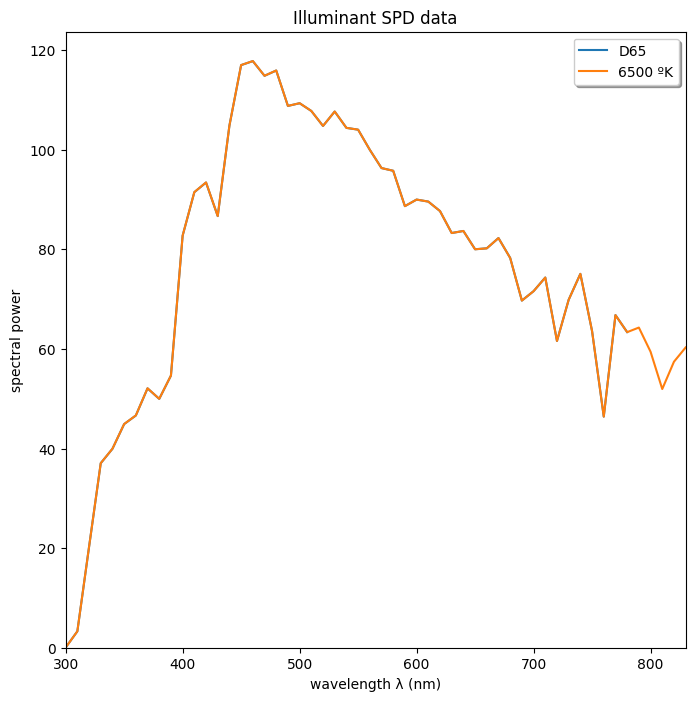

In [49]:
path_figure = os.path.join(*["res", "plot", "D65_vs_6500K.png"]) # your path here
cpt.plot_illuminant(illuminants, normalised = False, show_figure = True, save_figure = True, output_path = path_figure, title = "Illuminant SPD data")

### Attributes

In [50]:
print(cct_6500.type)
print(cct_6500.subtype)
print(cct_6500.cct_K)
print(cct_6500.illuminant_name)
print(cct_6500.nm_range)
print(cct_6500.nm_interval)
print(cct_6500.lambda_values)
print(cct_6500.normalised)

Spectral Object
SPD Illuminant computed from CCT
6500
6500 ºK
[300, 830]
5
[0.03410701074421739, 1.6649640286399658, 3.295821046535714, 11.769580169116395, 20.24333929169708, 28.65523613908625, 37.067132986475414, 38.51458247533762, 39.96203196419982, 42.44372773480638, 44.925423505412944, 45.78818226825301, 46.650941031093055, 49.377060938774335, 52.1031808464556, 51.04589598635213, 49.98861112624867, 52.32446305304058, 54.6603149798325, 68.71528464939324, 82.77025431895399, 87.13627414227277, 91.50229396559155, 92.47478613948415, 93.44727831337678, 90.07136853322397, 86.69545875307116, 95.7867783754486, 104.87809799782606, 110.9493270107602, 117.02055602369434, 117.42227122802359, 117.82398643235281, 116.34749985136162, 114.8710132703704, 115.40138230339083, 115.93175133641127, 112.37486393408582, 108.81797653176035, 109.08917375638066, 109.36037098100098, 108.58343235663901, 107.80649373227705, 106.29973108741922, 104.7929684425614, 106.24236745250217, 107.6917664624429, 106.0494014

### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [51]:
print(cct_6500)

IlluminantFromCCT object: CCT 6500 º K


`To get the SPD as a diagonal array`:

In [52]:
cct_6500_as_np = cct_6500.as_diagonal_array()
type(cct_6500_as_np)

numpy.ndarray

In [53]:
print(cct_6500_as_np.shape)

(107, 107)


`To set the SPD into the visible range spectrum`:

In [54]:
cct_6500.set_into_visible_range_spectrum(visible_nm_range = [400,700], visible_nm_interval = 10)

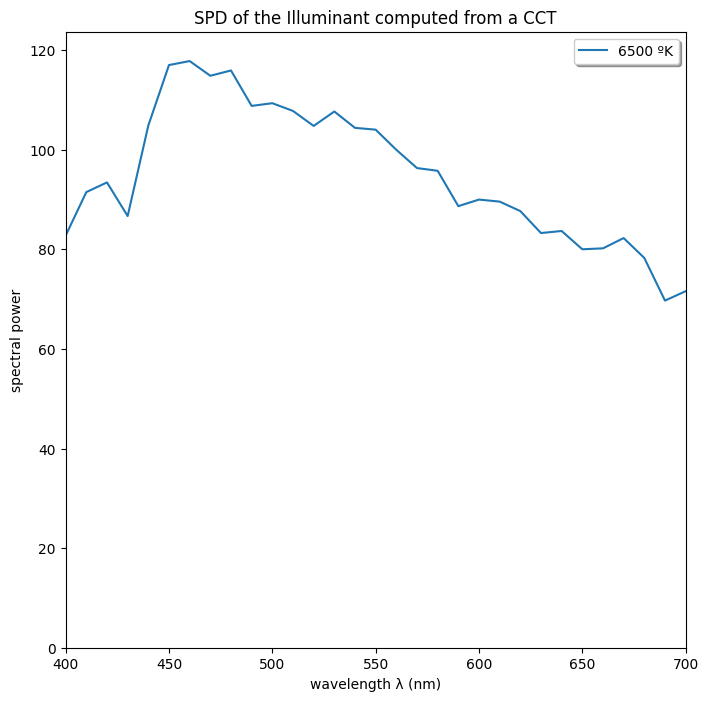

In [55]:
path_figure = os.path.join(*["res", "plot", "6500_spd_visible.png"]) # your path here
cct_6500.plot(show_figure=True, save_figure=True, output_path=path_figure)

`To normalise the SPD data`:

In [56]:
cct_6500 = IlluminantFromCCT(6500)

In [57]:
cct_6500.normalise_lambda_values()
print(cct_6500.normalised)

True


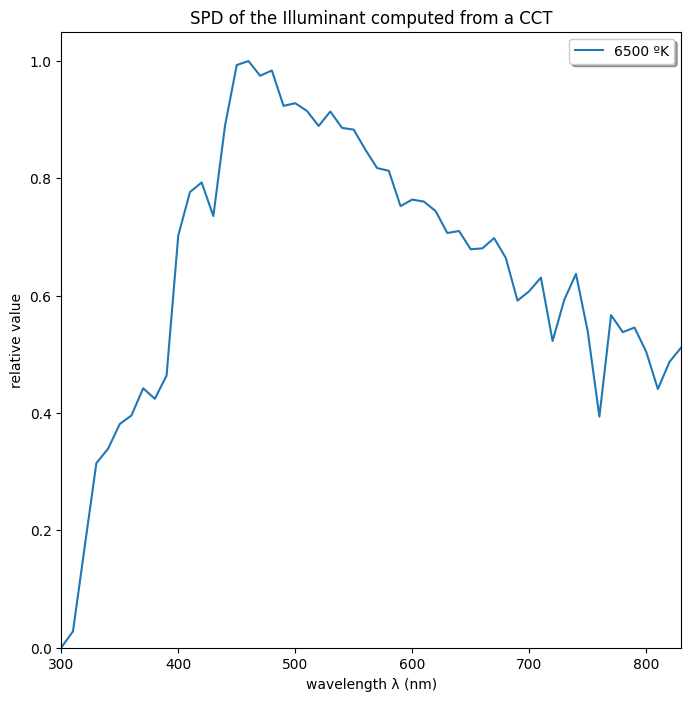

In [58]:
path_figure = os.path.join(*["res", "plot", "6500_spd_norm.png"]) # your path here
cct_6500.plot(show_figure=True, save_figure=True, output_path=path_figure)

`WhitePoint computations`:

To compute the XYZ of the *IlluminantFromCCT* WhitePoint:

In [59]:
Xn, Yn, Zn = cct_6500.compute_white_point_XYZ(observer=2)
print(Xn, Yn, Zn)

95.04272656841293 99.99999999999994 108.89116821618526


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [60]:
from coolpi.colour.cie_colour_spectral import Observer

In [61]:
obs = Observer(10)

In [62]:
Xn, Yn, Zn = cct_6500.compute_white_point_XYZ(observer=obs)
print(Xn, Yn, Zn)

94.8113122697153 100.0 107.3302775147145


To compute the x,y chromaticity coordinates of the *IlluminantFromCCT* WhitePoint:

In [63]:
xn, yn = cct_6500.compute_white_point_xy(observer=2)
print(xn, yn)

0.31270854682321936 0.3290189140334981


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [64]:
xn, yn = cct_6500.compute_white_point_xy(observer=obs)
print(xn, yn)

0.3137976216295172 0.33097065541803566


To compute the u',v' chromaticity coordinates of the *IlluminantFromCCT* WhitePoint:

In [65]:
un, vn = cct_6500.compute_white_point_uv_1976(observer=2)
print(un, vn)

0.1978288469952197 0.46833137243684275


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [66]:
un, vn = cct_6500.compute_white_point_uv_1976(observer=obs)
print(un, vn)

0.19785310137770626 0.4695320288716597


To compute the u,v chromaticity coordinates of the *IlluminantFromCCT* WhitePoint:

In [67]:
un, vn = cct_6500.compute_white_point_uv_1960(observer=2)
print(un, vn)

0.1978288469952197 0.31222091495789517


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [68]:
un, vn = cct_6500.compute_white_point_uv_1960(observer=obs)
print(un, vn)

0.19785310137770626 0.31302135258110647


`CCT computations`:

To compute the $\Delta_{uv}$ of the *IlluminantFromCCT*:

In [69]:
Duv = cct_6500.compute_Duv()
print(Duv)

0.0032128142198512427


### Plot

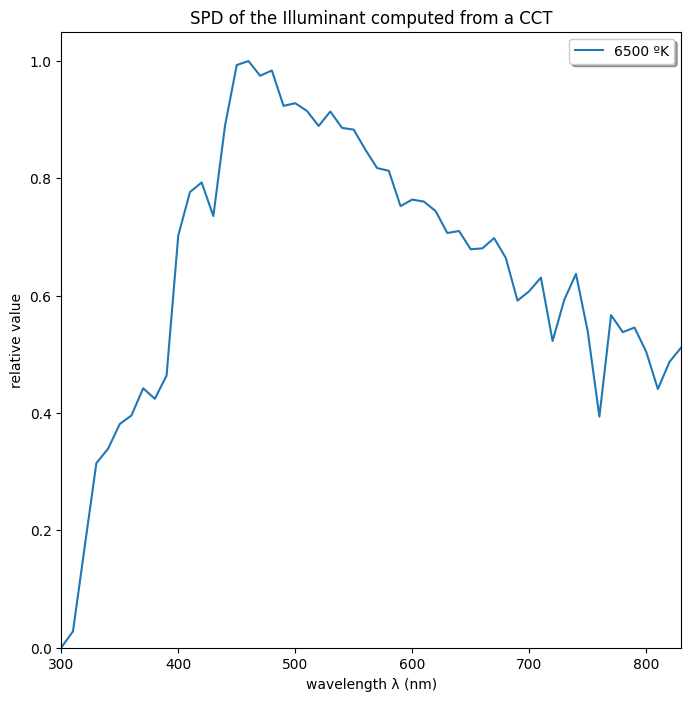

In [70]:
cct_6500.plot()

To save the figure:

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [71]:
path_figure = os.path.join(*["res", "plot", "6500_spd_norm.png"]) # your path here
cct_6500.plot(show_figure = False, save_figure = True, output_path = path_figure)

CIE 1931 x,y Chromaticity Diagram

The x,y values of the *IlluminantFromCCT* WhitePoint can be represented as follows:

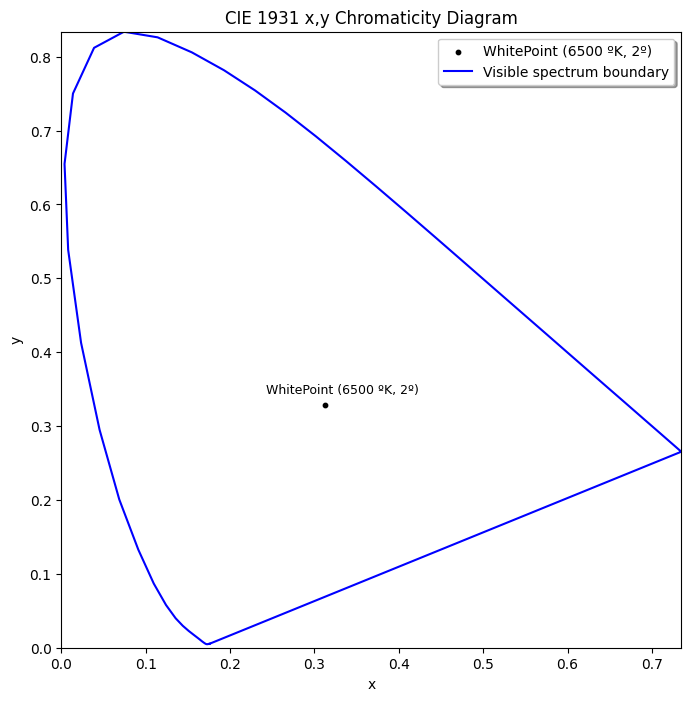

In [72]:
cct_6500.plot_xy_white_point(observer=2)

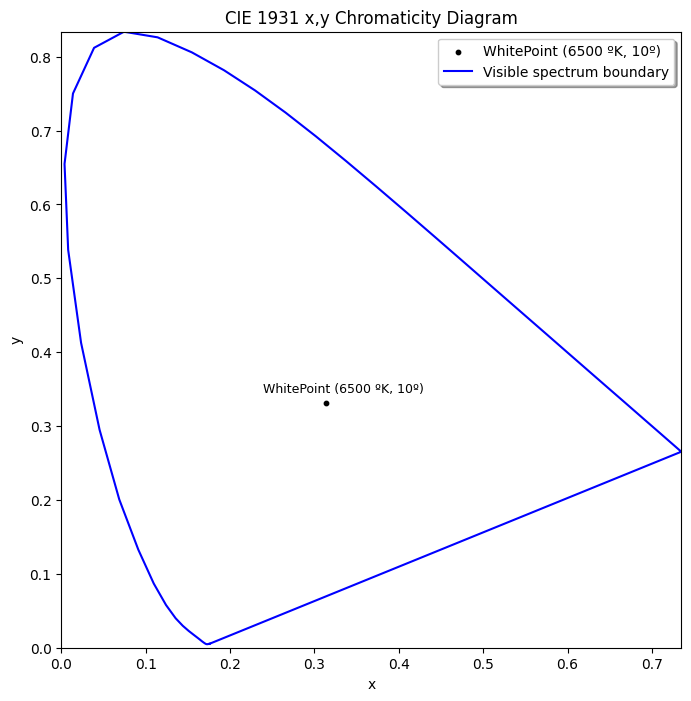

In [73]:
cct_6500.plot_xy_white_point(observer=obs)

In [74]:
path_figure = os.path.join(*["res", "plot", "6500_xy_2.png"])
cct_6500.plot_xy_white_point(observer=2, show_figure = False, save_figure = True, output_path = path_figure)

In [75]:
path_figure = os.path.join(*["res", "plot", "6500_xy_10.png"])
cct_6500.plot_xy_white_point(observer=obs, show_figure = False, save_figure = True, output_path = path_figure)

## MeasuredIlluminant

In [76]:
from coolpi.colour.cie_colour_spectral import MeasuredIlluminant

### To create an instance:

The `MeasuredIlluminant` class can be instantiated from: data (measured data as `dict`); from path_file (valid `os` path: CSV extension for Sekonic instrumental or JSON for other instruments).

From measured data as `dict`:

In [77]:
data_as_dict = {
"nm_range": [380, 780],
"nm_interval" :5,
"lambda_values": [0.0114073, 0.00985631, 0.0072386, 0.00728911, 0.01057201, 0.01290828,
    0.01089283, 0.00820896, 0.00928692, 0.01575225, 0.03204091, 0.04716717, 0.04427407, 
    0.03362948, 0.03129305, 0.0341507, 0.03702938, 0.0393975, 0.04113271, 0.0425808, 
    0.04451207, 0.04628982, 0.04587397, 0.04293254, 0.03907673, 0.03530976, 0.03190796, 
    0.02873687, 0.02581335, 0.02336659, 0.02249494, 0.02874496, 0.04532121, 0.05484243, 
    0.04516013, 0.02744621, 0.0213983, 0.02104433, 0.02324293, 0.02704061, 0.02970082, 
    0.02967269, 0.02855473, 0.02819227, 0.02867136, 0.03075241, 0.03364546, 0.03476707,
    0.03369897, 0.03211911, 0.03017166, 0.02761547, 0.02518627, 0.02336014, 0.02189655,
    0.02034273, 0.01835747, 0.01599688, 0.01375351, 0.01198202, 0.01058324, 0.0093942, 
    0.00819748, 0.00698151, 0.00614299, 0.00563017, 0.00501737, 0.00425217, 0.00352747, 
    0.00306196, 0.00279519, 0.00244556, 0.00205841, 0.00189265, 0.00200176, 0.00212645, 
    0.00203685, 0.00170677, 0.00143012, 0.00107608, 0.00085404]
}

In [78]:
instrument_metadata = {"Date": [[2022,6,19], [9,29,43]], "Measuring Mode": "Ambient", "Viewing Angle":2}

Note: The *MeasuredIlluminant* metadata can be set separately with the method `.set_instrument_measurement_as_metadata(metadata)`

In [79]:
JND65 = MeasuredIlluminant(illuminant_name="JND65", data=data_as_dict, path_file = None, metadata= instrument_metadata, normalised=False)

The `dict` should contain at least the following keys: "nm_range", "nm_interval", and "lambda_values".
Otherwise, a `DictLabelError` is raised. In addition, optional keys can also be added: (i.e. CCT, $\Delta_{uv}$).

In [80]:
data_as_dict_incomplete = {
"nm_range": [380, 780],
"nm_interval" :5
}

In [81]:
JND65 = MeasuredIlluminant(illuminant_name="JND65", data=data_as_dict_incomplete, path_file = None, metadata= instrument_metadata, normalised=False)

DictLabelError: Error in the dict or file with measurement data: Incomplete data or wrong labels.

From a generic JSON file with the measured data taken with any instrumental:

In [82]:
file_spd = ["res", "json", "JND65_Sekonic.json"]
path_spd = os.path.join(*file_spd)

In [83]:
JND65 = MeasuredIlluminant(illuminant_name="JND65", path_file = path_spd, metadata= instrument_metadata, normalised=False)

From a CSV file with the measured data taken using a Sekonic instrument: 

In [84]:
file_spd = ["res", "spd", "SPD_14_JND65_2022-06-19_02°_6658K.csv"]
path_spd = os.path.join(*file_spd)

In [85]:
JND65 = MeasuredIlluminant(illuminant_name="JND65", path_file = path_spd, metadata= instrument_metadata, normalised=False)

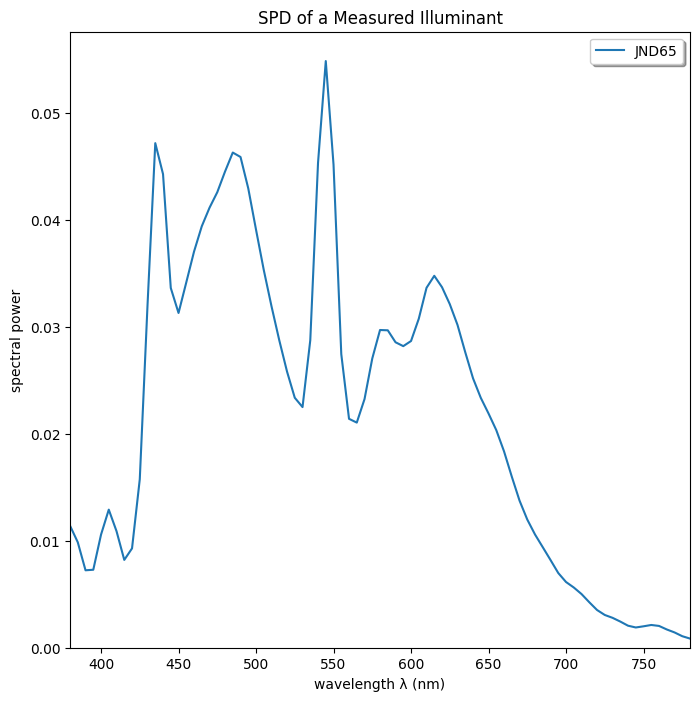

In [86]:
path_figure = os.path.join(*["res", "plot", "JND65_spd.png"]) # your path here
JND65.plot(show_figure = True, save_figure = True, output_path = path_figure)

### Attributes

In [87]:
print(JND65.type)
print(JND65.subtype)
print(JND65.illuminant_name)
print(JND65.nm_range)
print(JND65.nm_interval)
print(JND65.lambda_values)
print(JND65.normalised)
print(JND65.measured_data.keys())
print(JND65.metadata.keys())

Spectral Object
Measured SPD Illuminant
JND65
[380, 780]
5
[0.0114073  0.00985631 0.0072386  0.00728911 0.01057201 0.01290828
 0.01089283 0.00820896 0.00928692 0.01575225 0.03204091 0.04716717
 0.04427407 0.03362948 0.03129305 0.0341507  0.03702938 0.0393975
 0.04113271 0.0425808  0.04451207 0.04628982 0.04587397 0.04293254
 0.03907673 0.03530976 0.03190796 0.02873687 0.02581335 0.02336659
 0.02249494 0.02874496 0.04532121 0.05484243 0.04516013 0.02744621
 0.0213983  0.02104433 0.02324293 0.02704061 0.02970082 0.02967269
 0.02855473 0.02819227 0.02867136 0.03075241 0.03364546 0.03476707
 0.03369897 0.03211911 0.03017166 0.02761547 0.02518627 0.02336014
 0.02189655 0.02034273 0.01835747 0.01599688 0.01375351 0.01198202
 0.01058324 0.0093942  0.00819748 0.00698151 0.00614299 0.00563017
 0.00501737 0.00425217 0.00352747 0.00306196 0.00279519 0.00244556
 0.00205841 0.00189265 0.00200176 0.00212645 0.00203685 0.00170677
 0.00143012 0.00107608 0.00085404]
False
dict_keys(['nm_range', 'Date',

### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [88]:
print(JND65)

MeasuredIlluminant object: Illuminant JND65.


`To get the SPD as a diagonal array`:

In [89]:
JND65_as_np = JND65.as_diagonal_array()
type(JND65_as_np)

numpy.ndarray

In [90]:
print(JND65_as_np.shape)

(81, 81)


`To set the SPD into the visible range spectrum`:

In [91]:
JND65.set_into_visible_range_spectrum(visible_nm_range = [400,700], visible_nm_interval = 10)

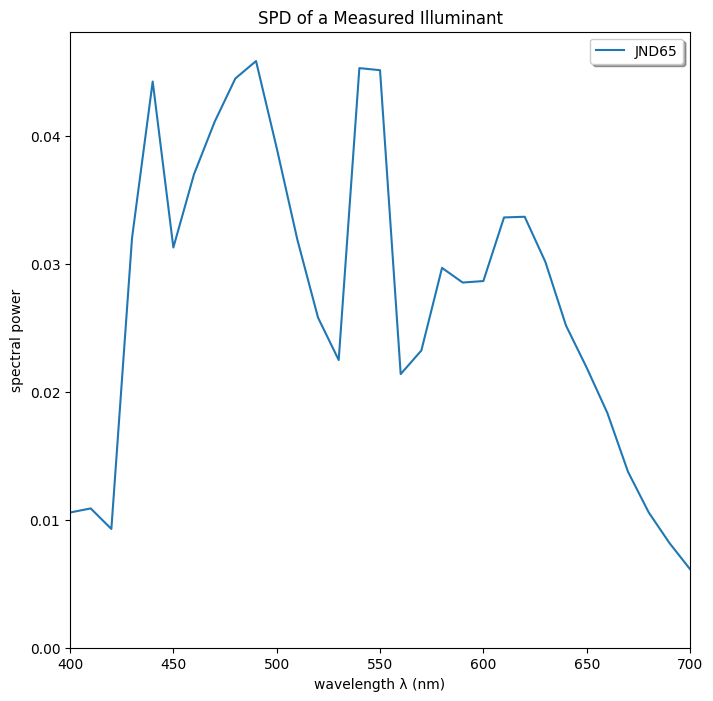

In [92]:
path_figure = os.path.join(*["res", "plot"], "JND65_spd_visible.png")
JND65.plot(show_figure=True, save_figure=True, output_path=path_figure)

`To normalise the SPD`:

In [93]:
JND65 = MeasuredIlluminant(illuminant_name="JND65", path_file = path_spd, metadata= instrument_metadata, normalised=True)

In [94]:
JND65.normalised

True

An alternative wat to normalise the spectral data:

In [95]:
JND65 = MeasuredIlluminant(illuminant_name="JND65", path_file = path_spd, metadata= instrument_metadata, normalised=False)

In [96]:
JND65.normalise_lambda_values()
JND65.normalised

True

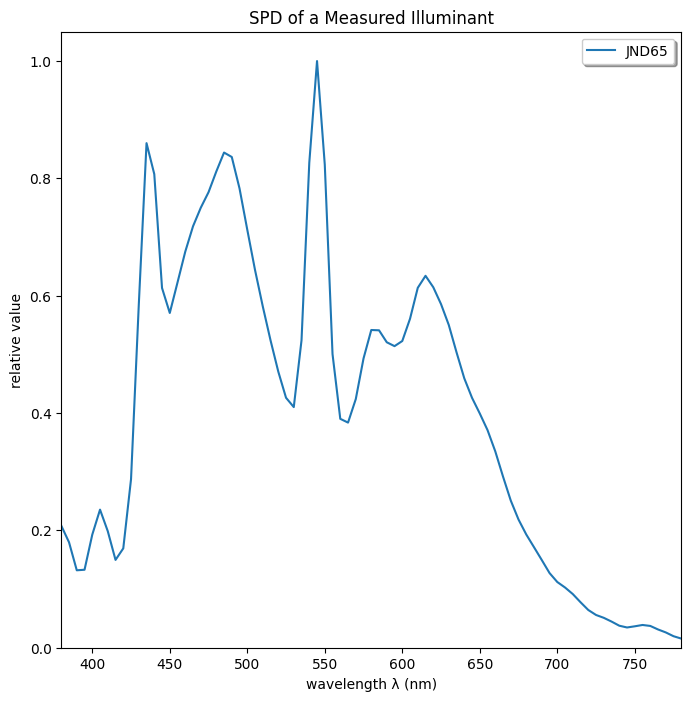

In [97]:
path_figure = os.path.join(*["res", "plot", "JND65_spd_norm.png"]) # your path here
JND65.plot(show_figure=True, save_figure=True, output_path=path_figure)

`WhitePoint computations`:

To compute the X, Y, Z values of the *MeasuredIlluminant* WhitePoint:

In [98]:
Xn, Yn, Zn = JND65.compute_white_point_XYZ(observer=2)
print(Xn, Yn, Zn)

96.49001962118156 100.0 113.77215723444507


Compare to measured data (if avaliable):

In [99]:
Xn_, Yn_, Zn_ = JND65.measured_data["XYZ"]
print(Xn_/Yn_*100, Yn_/Yn_*100, Zn_/Yn_*100) # Normalized to Yn_ and scaled

96.49001954952843 100.0 113.77215849328286


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [100]:
from coolpi.colour.cie_colour_spectral import Observer

In [101]:
obs = Observer(10)

In [102]:
Xn, Yn, Zn = JND65.compute_white_point_XYZ(observer=obs)
print(Xn, Yn, Zn)

94.66708943782882 100.00000000000006 108.51020312717426


To compute the x,y chromaticity coordinates of the *MeasuredIlluminant* WhitePoint:

In [103]:
xn, yn = JND65.compute_white_point_xy(observer=2)
print(xn, yn)

0.31099510935901464 0.3223080589888747


Compare to measured data (if available):

In [104]:
xn_, yn_, zn_ = JND65.measured_data["xyz"]
print(xn_, yn_, zn_) 

0.311 0.3223 0.3667


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [105]:
xn, yn = JND65.compute_white_point_xy(observer=obs)
print(xn, yn)

0.3122499334858055 0.3298400060042736


To compute the $u',v'$ chromaticity coordinates of the *MeasuredIlluminant* WhitePoint:

In [106]:
un, vn = JND65.compute_white_point_uv_1976(observer=2)
print(un, vn)

0.19917369469689275 0.4644426592795847


Compare to measured data (if available):

In [107]:
un_, vn_ = JND65.measured_data["u'v'"]
print(un_, vn_ ) 

0.1992 0.4644


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [108]:
un, vn = JND65.compute_white_point_uv_1976(observer=obs)
print(un, vn)

0.19720279739119692 0.46870173865606235


To compute the u,v chromaticity coordinates of the *MeasuredIlluminant* WhitePoint:

In [109]:
un, vn = JND65.compute_white_point_uv_1960(observer=2)
print(un, vn)

0.19917369469689275 0.30962843951972313


It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [110]:
un, vn = JND65.compute_white_point_uv_1960(observer=obs)
print(un, vn)

0.19720279739119692 0.31246782577070825


`CCT cpmputations`:

To compute the CCT of the *MeasuredIlluminant*:

In [111]:
cct_k = JND65.compute_CCT(method="McCamy")
print(cct_k)

6655.347717016843


In [112]:
cct_k = JND65.compute_CCT(method="Hernandez")
print(cct_k)

6655.424286531472


In [113]:
cct_k = JND65.compute_CCT(method="Ohno")
print(cct_k)

6656.262990065892


Compare to measured data (if available):

In [114]:
cct_k_ = JND65.measured_data["CCT"]
print(cct_k_)

6658


To compute the $\Delta_{uv}$ of the *MeasuredIlluminant*:

In [115]:
Delta_uv = JND65.compute_Duv()
print(Delta_uv)

0.0006092222311397388


Compare to measured data (if available):

In [116]:
Delta_uv_ = JND65.measured_data["Delta_uv"]
print(Delta_uv_)

0.0006


### Plot

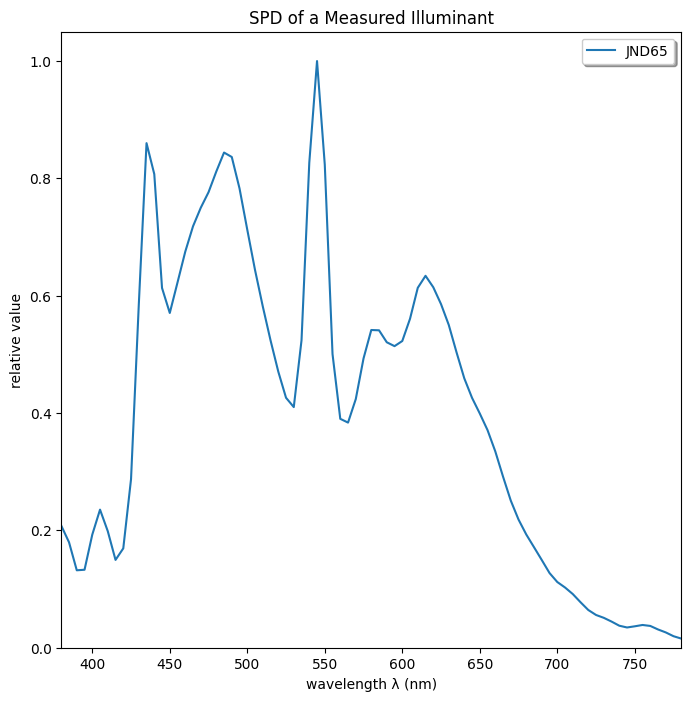

In [117]:
JND65.plot()

To save the figure:

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [118]:
path_figure = os.path.join(*["res", "plot", "JND65_spd_norm.png"]) # your path here
JND65.plot(show_figure = False, save_figure = True, output_path = path_figure)

CIE 1931 x,y Chromaticity Diagram

The x,y values of the *MeasuredIlluminant* WhitePoint can be represented as follows:

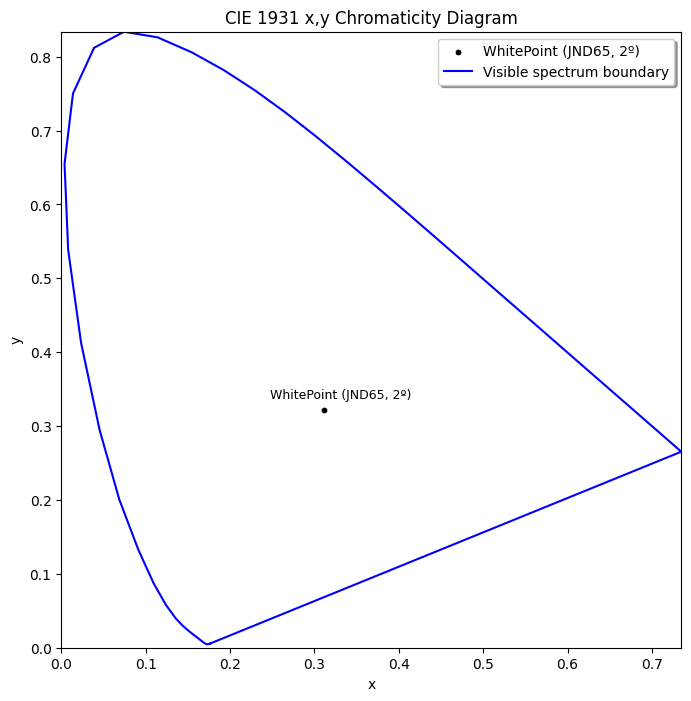

In [119]:
JND65.plot_xy_white_point(observer=2)

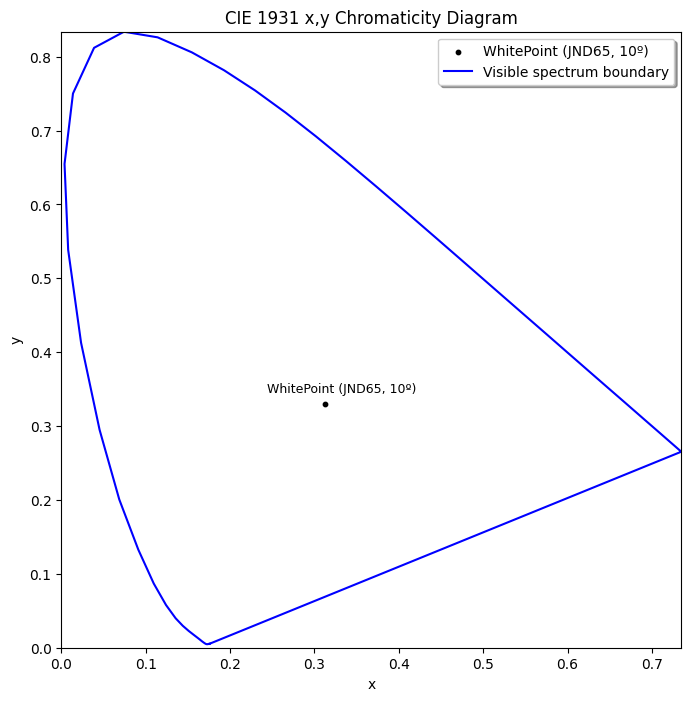

In [120]:
JND65.plot_xy_white_point(observer=obs)

In [121]:
path_figure = os.path.join(*["res", "plot", "JND65_xy_2.png"]) # your path here
JND65.plot_xy_white_point(observer=2, show_figure = False, save_figure = True, output_path = path_figure)

In [122]:
path_figure = os.path.join(*["res", "plot"], "JND65_xy_10.png") # your path here
JND65.plot_xy_white_point(observer=obs, show_figure = False, save_figure = True, output_path = path_figure)

## WhitePoint

In [123]:
from coolpi.colour.cie_colour_spectral import WhitePoint

### To create an instance:

The WhitePoint class can be instantiated for any type of illuminant: `str` (for a valid CIE illuminant name), `Illuminant`, `IlluminantFromCCT` or `MeasuredIlluminant` object

To create an instance of the `WhitePoint` class, simply enter the required parameters as follows:

CIE Illuminant name as `str` or `Illuminant` object:

In [124]:
wp_d65 = WhitePoint(illuminant="D65", observer=2)
type(wp_d65)

coolpi.colour.cie_colour_spectral.WhitePoint

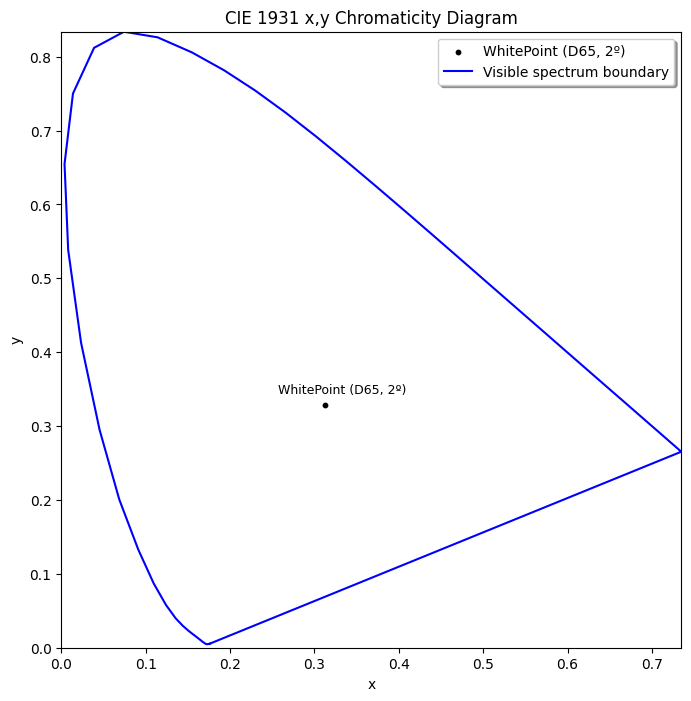

In [125]:
wp_d65.plot_xy_white_point()

It is possible to introduce an *Observer* object to the class method as an `observer` parameter as follows:

In [126]:
from coolpi.colour.cie_colour_spectral import Observer

In [127]:
obs = Observer(10)

In [128]:
wp_d65_10 = WhitePoint(illuminant="D65", observer=obs)
type(wp_d65_10)

coolpi.colour.cie_colour_spectral.WhitePoint

To get the Xn, Yn, Zn values:

In [129]:
Xn, Yn, Zn = wp_d65.coordinates
print(Xn, Yn, Zn)

95.04 100.0 108.88


Theoretical data are available only for the CIE illuminants: A, C, D50, D55, D65 and D75. For all remaining illuminants
implemented, the X, Y, Z values of the illuminant white point are computed.

In [130]:
wp_ledb1 = WhitePoint(illuminant="LED-B1", observer=2)

In [131]:
Xn, Yn, Zn = wp_ledb1.coordinates
print(Xn, Yn, Zn)

111.8078554407522 100.0 33.41107903970757


For an `IlluminantFromCCT` instance:

In [132]:
from coolpi.colour.cie_colour_spectral import IlluminantFromCCT

In [133]:
spd_cct = IlluminantFromCCT(6500)

In [134]:
wp_cct = WhitePoint(illuminant=spd_cct, observer=2)

In [135]:
Xn, Yn, Zn = wp_cct.coordinates
print(Xn, Yn, Zn)

95.04272656841287 99.99999999999993 108.89116821618512


For a `MeasuredIlluminant` instance:

In [136]:
wp_measured = WhitePoint(illuminant=JND65, observer=2)

In [137]:
Xn, Yn, Zn = wp_measured.coordinates
print(Xn, Yn, Zn)

96.49001962118156 100.0 113.77215723444507


The `WhitePoint` should to be specified for a valid CIE standard illuminant and observer:

In [138]:
wp_d65 = WhitePoint(illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [139]:
wp_d65 = WhitePoint(illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [140]:
print(wp_d65.type)
print(wp_d65.colour_space()) # subtype
print(wp_d65.subtype) # returns colour space
print(wp_d65.name_id)
print(wp_d65.coordinates)
print(wp_d65.illuminant) # str method
print(wp_d65.observer) # Observer str method
print(wp_d65.get_sample()) # colour data as dict

Colour Object
CIE XYZ
WhitePoint XYZ
WhitePoint for illuminant D65 and 2 º observer
[95.04, 100.0, 108.88]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'WhitePoint for illuminant D65 and 2 º observer': [95.04, 100.0, 108.88]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [141]:
print(wp_d65)

WhitePoint for D65 illuminant and 2º observer: Xn=95.04, Yn=100.0, Zn=108.88


`Colour Space Conversion`:

Only conversions to CIE xyY and CIE uvY colour spaces are allowed for a `WhitePoint` object:

In [142]:
wp_d65_xyY = wp_d65.to_xyY() # returns a CIExyY class object
type(wp_d65_xyY)

coolpi.colour.cie_colour_spectral.CIExyY

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [143]:
print("xyY   = ", wp_d65.to_xyY().coordinates)
print("uvY   = ", wp_d65.to_uvY().coordinates)

xyY   =  [0.3127138720715978, 0.3290339563042906, 100.0]
uvY   =  [0.19782690146122145, 0.46834020232296747, 100.0]


Only conversions to CIE xyY and CIE uvY colour spaces are implemented for a `WhitePoint` object.

### Plot

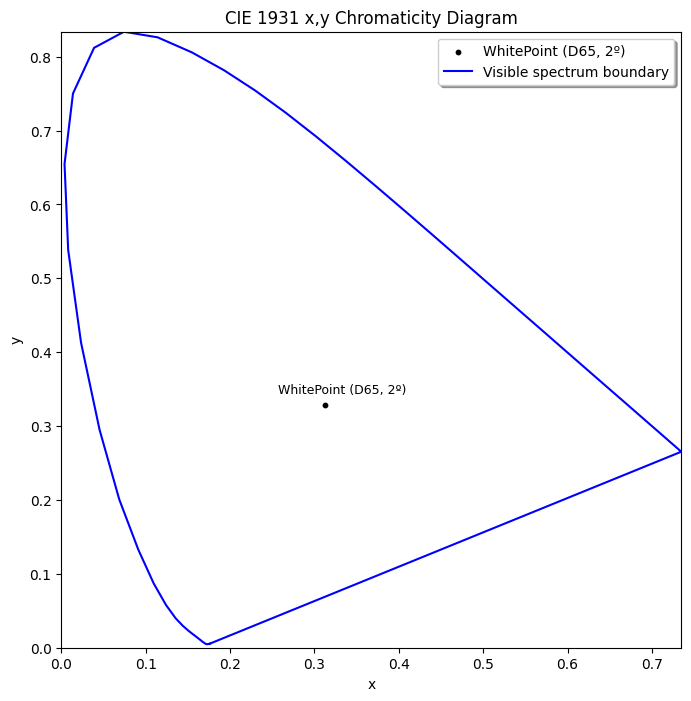

In [144]:
wp_d65.plot_xy_white_point()

To save the figure:

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [145]:
path_figure = os.path.join(*["res", "plot", "whitepoint_sample.png"]) # your path here
wp_d65.plot_xy_white_point(show_figure = False, save_figure = True, output_path = path_figure)

## SpectralColor

In [146]:
from coolpi.colour.cie_colour_spectral import SpectralColour

### To create an instance

To create an instance of the *SpectralColour* class, simply enter the required parameters as follows:

In [147]:
lambda_data = [6.0475, 6.0475, 6.0475, 6.0475, 6.0475, 5.97, 5.8775, 5.845, 5.8625, 5.9225, 5.99, 6.06, 6.245, 6.49,
    7.175, 9.435, 13.045, 15.6575, 17.1975, 19.415, 24.47, 33.2475, 44.34, 53.75, 58.15, 58.6625, 58.1725, 57.9075, 57.5325, 
    57.32, 57.91, 59.6, 61.6025, 63.5, 64.97, 64.97, 64.97, 64.97, 64.97]

In [148]:
sample_spc = SpectralColour(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant="D65", observer=2)

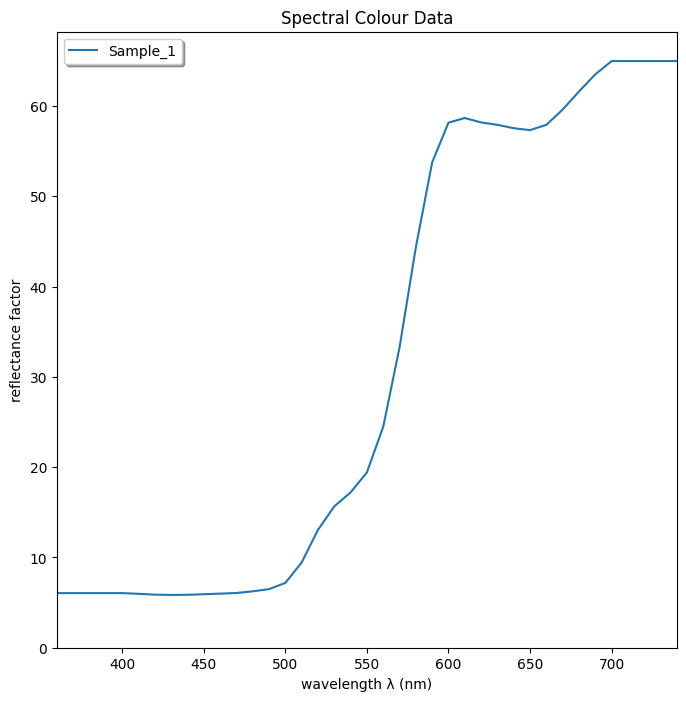

In [149]:
path_figure = os.path.join(*["res", "plot", "spc_colour_plot.png"]) # your path here
sample_spc.plot(show_figure = True, save_figure = True, output_path = path_figure)

The *SpectralColour* should be specified for a valid CIE standard illuminant and observer:

In [150]:
sample_spc = SpectralColour(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [151]:
sample_spc = SpectralColour(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [152]:
print(sample_spc.type)
print(sample_spc.subtype)
print(sample_spc.name_id)
print(sample_spc.illuminant) # str method
print(sample_spc.observer) # str method
print(sample_spc.nm_range)
print(sample_spc.nm_interval)
print(sample_spc.lambda_values)
print(sample_spc.scaled)

Spectral Object
Spectral colour data referred to a CIE illuminant
Sample_1
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
[360, 740]
10
[6.0475, 6.0475, 6.0475, 6.0475, 6.0475, 5.97, 5.8775, 5.845, 5.8625, 5.9225, 5.99, 6.06, 6.245, 6.49, 7.175, 9.435, 13.045, 15.6575, 17.1975, 19.415, 24.47, 33.2475, 44.34, 53.75, 58.15, 58.6625, 58.1725, 57.9075, 57.5325, 57.32, 57.91, 59.6, 61.6025, 63.5, 64.97, 64.97, 64.97, 64.97, 64.97]
False


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [153]:
print(sample_spc)

SpectralColour object: Sample_1


`To get the spectral data as a diagonal array`:

In [154]:
sample_spc_as_np = sample_spc.as_diagonal_array()
type(sample_spc_as_np)

numpy.ndarray

In [155]:
print(sample_spc_as_np.shape)

(39, 39)


`To set the spectral data into the visible spectrum`:

In [156]:
sample_spc.set_into_visible_range_spectrum(visible_nm_range=[400,700], visible_nm_interval=10)

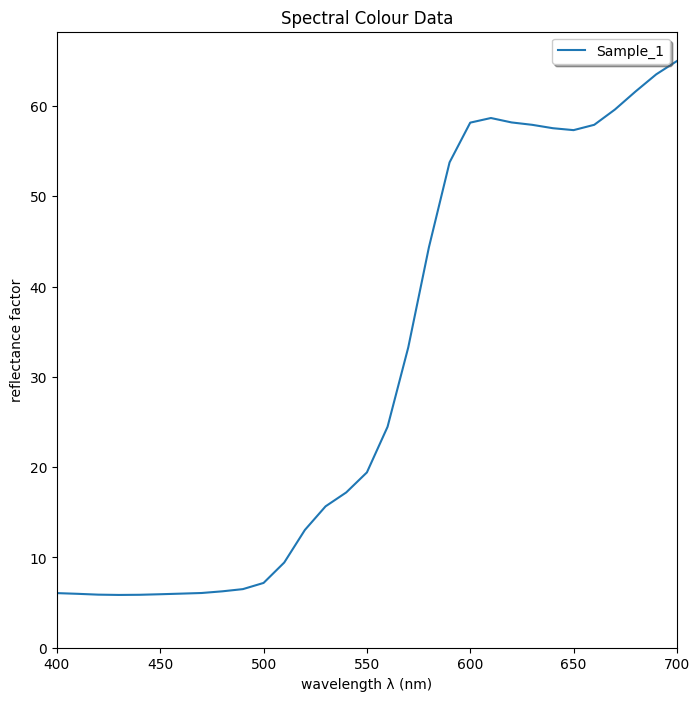

In [157]:
path_figure = os.path.join(*["res", "plot", "spc_colour_visible_plot.png"]) # your path here
sample_spc.plot(show_figure = True, save_figure = True, output_path = path_figure)

`To scale spectral data into range (0,1)`:

In [158]:
sample_spc.scale_lambda_values()
print(sample_spc.scaled)

True


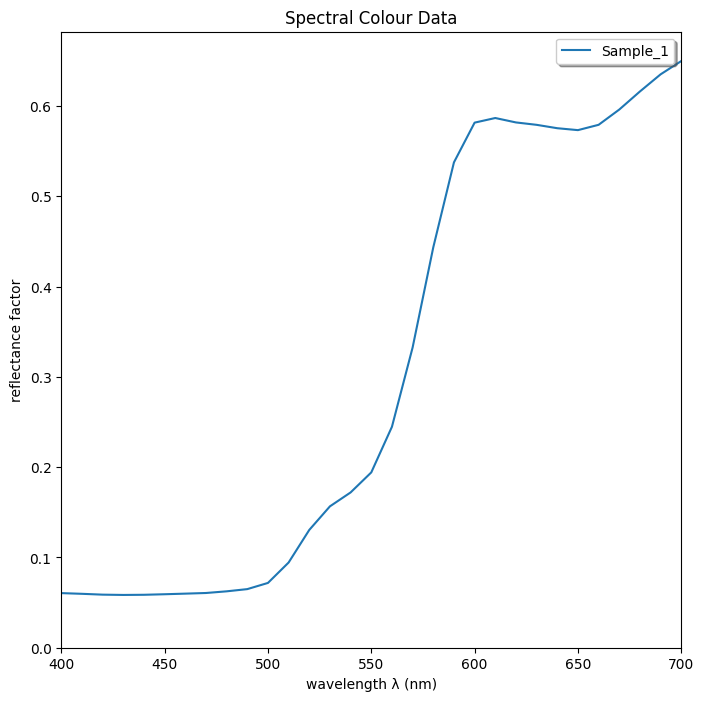

In [159]:
path_figure = os.path.join(*["res", "plot", "spc_colour_scaled_plot.png"]) # your path here
sample_spc.plot(show_figure = True, save_figure = True, output_path = path_figure)

`Colour Space Conversion`:

To compute the CIE XYZ from the spectral data:

Using full spectral data

In [160]:
sample_spc = SpectralColour(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant="D65", observer=2)

In [161]:
X, Y, Z = sample_spc.to_XYZ()
print(X, Y, Z)

36.87034965110855 29.52534750336318 6.768737346875687


Using only the spectral data into the visible spectrum:

In [162]:
X, Y, Z  = sample_spc.to_XYZ(visible=True)
print(X, Y, Z)

36.8208393765158 29.51360348192101 6.757552323290141


### Plot

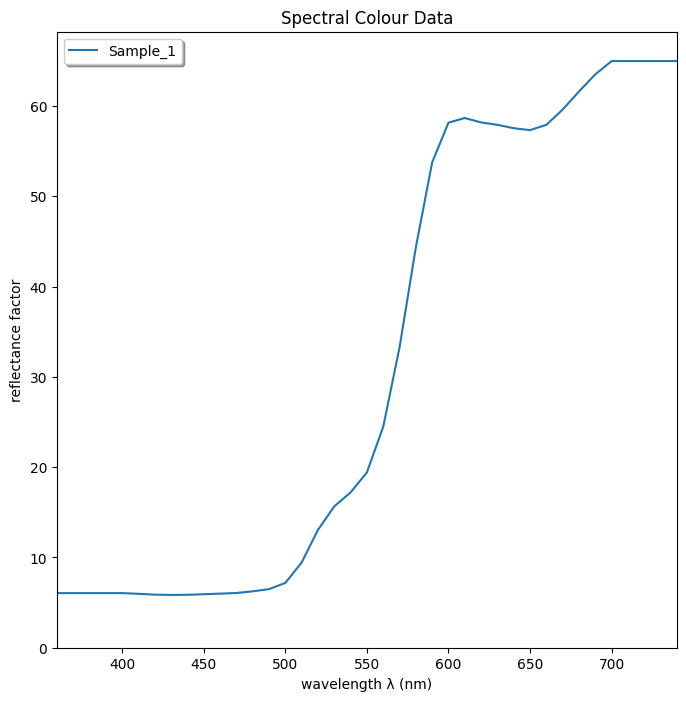

In [163]:
sample_spc.plot()

To save the figure:

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [164]:
path_figure = os.path.join(*["res", "plot", "spc_colour_plot.png"]) # your path here
sample_spc.plot(show_figure = False, save_figure = True, output_path = path_figure)

## Reflectance

In [165]:
from coolpi.colour.cie_colour_spectral import Reflectance

### To create an instance:

The *Reflectance* could be instantiated not only for a valid CIE standard illuminant (`str`) (Otherwise a `CIEIlluminantError` is raised) 
or *Illuminant* object, but for an *IlluminantFromCCT* or *MeasuredIlluminant* objects.

To create an instance of the `Reflectance` class, simply enter the required parameters as follows:

In [166]:
rfc_metadata = {"NameColorChart": "Calibrite colorchecker CLASSIC", "Manufacturer":["Calibrite", "Made in USA", 850028833087, 2021], "Measurement Date": [[2022, 3, 11], [10, 13, 40]], "Instrument": "Konica Minolta CM-600d", "Illuminant": "D65", "Observer": 2, "Geometry": "di:8, de:8", "Specular Component":"SCI", "Measurement Area": "MAV(8mm)"}

In [167]:
lambda_data = [6.0475, 6.0475, 6.0475, 6.0475, 6.0475, 5.97, 5.8775, 5.845, 5.8625, 5.9225, 5.99, 6.06, 6.245, 6.49,
    7.175, 9.435, 13.045, 15.6575, 17.1975, 19.415, 24.47, 33.2475, 44.34, 53.75, 58.15, 58.6625, 58.1725, 57.9075, 57.5325, 
    57.32, 57.91, 59.6, 61.6025, 63.5, 64.97, 64.97, 64.97, 64.97, 64.97]

In [168]:
from coolpi.colour.cie_colour_spectral import IlluminantFromCCT
cct_6500 = IlluminantFromCCT(6500)

In [169]:
sample_rfc = Reflectance(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant=cct_6500, observer=2, metadata=rfc_metadata)

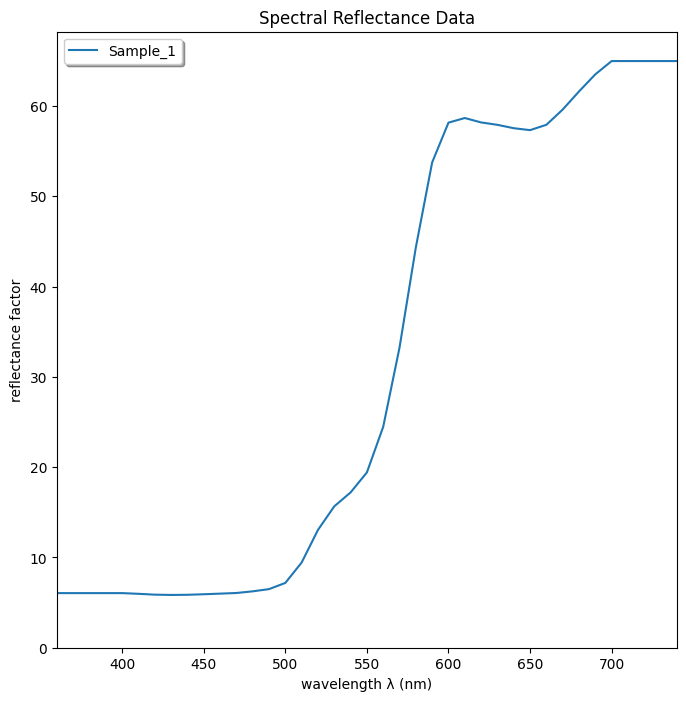

In [170]:
sample_rfc.plot()

In [172]:
path_figure = os.path.join(*["res", "plot", "reflectance_plot.png"]) # your path here
sample_rfc.plot(show_figure = False, save_figure = True, output_path = path_figure)

In case of specifying a not valid CIE standard illuminant or observer:

In [173]:
sample_rfc = Reflectance(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

The *Reflectance* should to be specified for a valid CIE standard observer:

In [174]:
sample_rfc = Reflectance(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [175]:
print(sample_rfc.type)
print(sample_rfc.subtype)
print(sample_rfc.name_id)
print(sample_rfc.illuminant) # str method
print(sample_rfc.observer) # str method
print(sample_rfc.nm_range)
print(sample_rfc.nm_interval)
print(sample_rfc.lambda_values)
print(sample_rfc.scaled)
print(sample_rfc.metadata.keys())

Spectral Object
Reflectance data of a colour sample
Sample_1
IlluminantFromCCT object: CCT 6500 º K
2º standard observer (CIE 1931)
[360, 740]
10
[6.0475, 6.0475, 6.0475, 6.0475, 6.0475, 5.97, 5.8775, 5.845, 5.8625, 5.9225, 5.99, 6.06, 6.245, 6.49, 7.175, 9.435, 13.045, 15.6575, 17.1975, 19.415, 24.47, 33.2475, 44.34, 53.75, 58.15, 58.6625, 58.1725, 57.9075, 57.5325, 57.32, 57.91, 59.6, 61.6025, 63.5, 64.97, 64.97, 64.97, 64.97, 64.97]
False
dict_keys(['NameColorChart', 'Manufacturer', 'Measurement Date', 'Instrument', 'Illuminant', 'Observer', 'Geometry', 'Specular Component', 'Measurement Area'])


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [176]:
print(sample_rfc)

Reflectance object: Sample_1


`To get the reflectance data as a diagonal array`:

In [177]:
sample_rfc_as_np = sample_rfc.as_diagonal_array()
type(sample_rfc_as_np)

numpy.ndarray

In [178]:
print(sample_rfc_as_np.shape)

(39, 39)


`To set the reflectance data into the visible spectrum`:

In [179]:
sample_rfc.set_into_visible_range_spectrum(visible_nm_range=[400,700], visible_nm_interval=10)

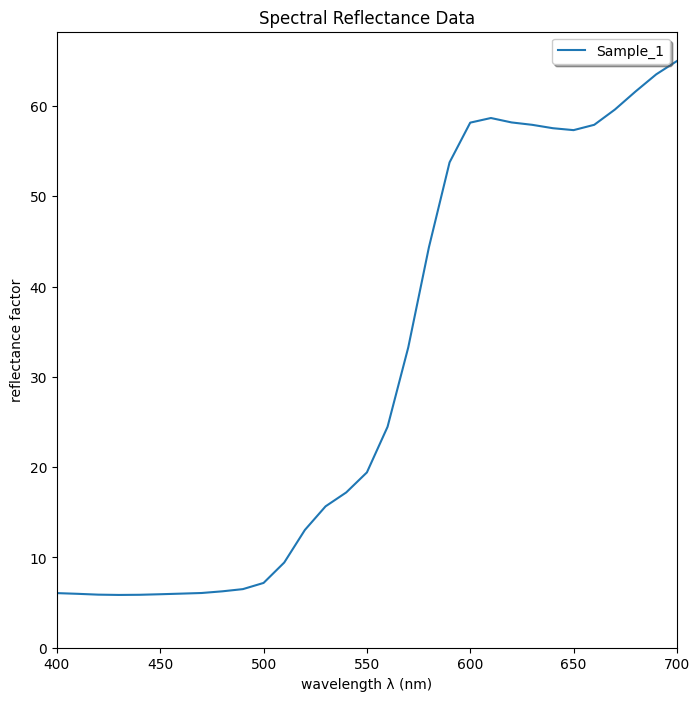

In [180]:
path_figure = os.path.join(*["res", "plot"], "reflectance_visible_plot.png")
sample_rfc.plot(show_figure = True, save_figure = True, output_path = path_figure)

`To scale the reflectance data into the range (0,1)`:

In [181]:
sample_rfc.scale_lambda_values()
print(sample_rfc.scaled)

True


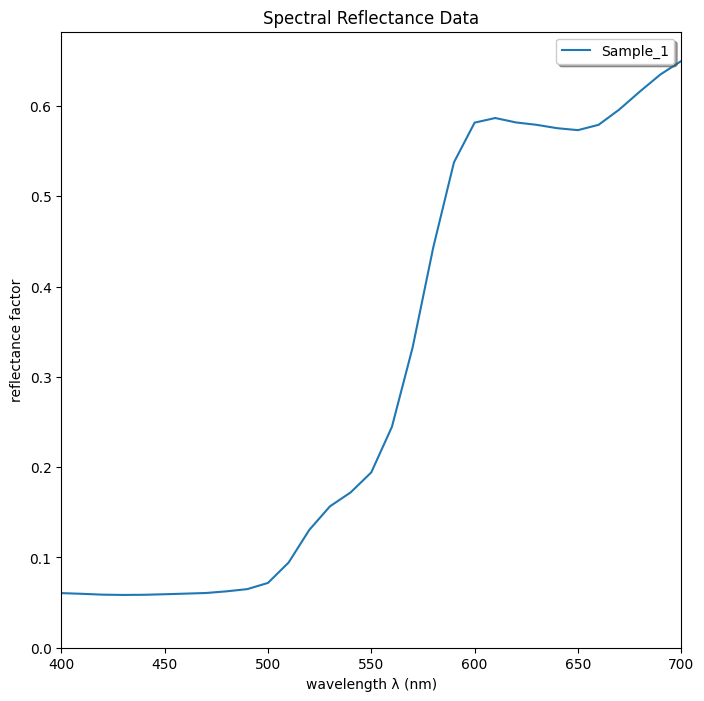

In [182]:
path_figure = os.path.join(*["res", "plot", "reflectance_scaled_plot.png"]) # your path here
sample_rfc.plot(show_figure = True, save_figure = True, output_path = path_figure)

`Colour Space Conversion`:

To compute the CIE XYZ from the reflectance data:

Using full spectral data

In [183]:
sample_rfc = Reflectance(name_id="Sample_1", nm_range=[360, 740], nm_interval=10, lambda_values= lambda_data, illuminant="D65", observer=2, metadata=rfc_metadata)

In [184]:
X, Y, Z = sample_rfc.to_XYZ()
print(X, Y, Z)

36.87034965110855 29.52534750336318 6.768737346875687


Using only the spectral data into the visible spectrum:

In [185]:
X, Y, Z= sample_rfc.to_XYZ(visible=True)
print(X, Y, Z)

36.8208393765158 29.51360348192101 6.757552323290141


### Plot

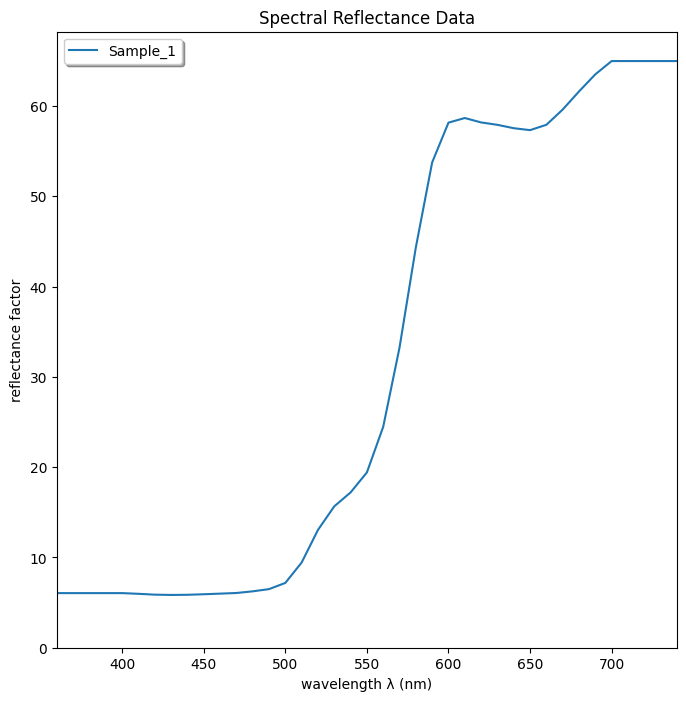

In [186]:
sample_rfc.plot()

To save the figure:

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [ ]:
path_figure = os.path.join(*["res", "plot", "reflectance_plot.png"]) # your path here
sample_rfc.plot(show_figure = False, save_figure = True, output_path = path_figure)